개인뇌파 결과지
0.5916161717768837


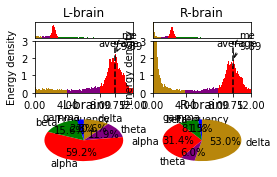

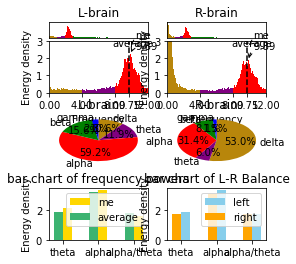

In [2]:
import numpy as np
from numpy import trapz
import matplotlib.pyplot as plt

freq=[]
ch1=[]
ch2=[]
eeg=[]
pch1=[]
pch2=[]

print("개인뇌파 결과지")
#avr of power spectrum

f = open('avr.txt','r')
lines = f.readlines()[3:]
for line in lines:
    if line.strip() == '': continue
    vals=line.split('\t')
    freq.append(float(vals[0]))
    ch1.append(float(vals[1]))
    ch2.append(float(vals[2]))
f.close()


afreq=np.array(freq)
ach1=np.array(ch1)
ach2=np.array(ch2)

#좌뇌 행렬
afreqch1=np.column_stack((afreq, ach1))  #column_stack(('행렬의 행 값', '행렬의 열 값'))
deltach1=afreqch1[(afreqch1[:,0] >= 0) & (afreqch1[:,0] <= 4)]
thetach1=afreqch1[(afreqch1[:,0] >= 4) & (afreqch1[:,0] <= 8)]
alphach1=afreqch1[(afreqch1[:,0] >= 8) & (afreqch1[:,0] <= 12)]
betach1=afreqch1[(afreqch1[:,0] >= 12) & (afreqch1[:,0] <= 30)]
gammach1=afreqch1[(afreqch1[:,0] >= 30) & (afreqch1[:,0] <= 50)]

#우뇌 행렬
afreqch2=np.column_stack((afreq, ach2))
deltach2=afreqch2[(afreqch2[:,0] >= 0) & (afreqch2[:,0] <= 4)]
thetach2=afreqch2[(afreqch2[:,0] >= 4) & (afreqch2[:,0] <= 8)]
alphach2=afreqch2[(afreqch2[:,0] >= 8) & (afreqch2[:,0] <= 12)]
betach2=afreqch2[(afreqch2[:,0] >= 12) & (afreqch2[:,0] <= 30)]
gammach2=afreqch2[(afreqch2[:,0] >= 30) & (afreqch2[:,0] <= 50)]

fig = plt.figure();
fig.subplots_adjust()

bindwidth = freq[1]-freq[0];


#전체 범위 축소 그래프

#좌뇌
ax1 = plt.subplot2grid((12,3), (0,0))
ax1.bar(deltach1[:,0], deltach1[:,1], label='left', color='darkgoldenrod', width=bindwidth)
ax1.bar(thetach1[:,0],thetach1[:,1], label='left', color='purple', width=bindwidth)
ax1.bar(alphach1[:,0], alphach1[:,1], label='left', color='r', width=bindwidth)
ax1.bar(betach1[:,0], betach1[:,1], label='left', color='g', width=bindwidth)
ax1.bar(gammach1[:,0], gammach1[:,1], label='left', color='b', width=bindwidth)
plt.xlim(0,50)
ax1.set_xticks([])
plt.ylim(0, 2.5)
ax1.set_yticks([])
plt.title('L-brain')



#우뇌
ax2 = plt.subplot2grid((12,3), (0,1))
ax2.bar(deltach2[:,0], deltach2[:,1], label='left', color='darkgoldenrod', width=bindwidth)
ax2.bar(thetach2[:,0],thetach2[:,1], label='left', color='purple', width=bindwidth)
ax2.bar(alphach2[:,0], alphach2[:,1], label='left', color='r', width=bindwidth)
ax2.bar(betach2[:,0], betach2[:,1], label='left', color='g', width=bindwidth)
ax2.bar(gammach2[:,0], gammach2[:,1], label='left', color='b', width=bindwidth)
plt.xlim(0,50)
ax2.set_xticks([])
plt.ylim(0, 2.5)
ax2.set_yticks([])
plt.title('R-brain')



#알파피크 주파수
thetaalphach1 = afreqch1[(afreqch1[:,0] >= 4) & (afreqch1[:,0] <= 12)]
maxidxch1 = ch1.index(max(thetaalphach1[:,1]));
peakfreqch1 = afreqch1[:,0][maxidxch1];
maxpowerch1 = afreqch1[:,1][maxidxch1];

thetaalphach2 = afreqch2[(afreqch2[:,0] >= 4) & (afreqch2[:,0] <= 12)]
maxidxch2 = ch2.index(max(thetaalphach2[:,1]));
peakfreqch2 = afreqch2[:,0][maxidxch2];
maxpowerch2 = afreqch2[:,1][maxidxch2];


age=2017-1970 #age=올해 - 측정자가 태어난 해

if 0< age < 30:
    dic={"avrthetap":2.05, "avralphap":3.63, "avralphathetap":1.77, "alphapeak":9.86}
elif 30 <= age < 40:
    dic={"avrthetap":2.00, "avralphap":3.75, "avralphathetap":1.88, "alphapeak":9.84}
elif 40 <= age < 50:
    dic={"avrthetap":2.09, "avralphap":3.31, "avralphathetap":1.58, "alphapeak":9.75}
elif 50 <= age < 60:
    dic={"avrthetap":2.01, "avralphap":3.45, "avralphathetap":1.72, "alphapeak":9.76}
elif 60 <= age < 70:
    dic={"avrthetap":1.99, "avralphap":3.13, "avralphathetap":1.57, "alphapeak":9.62}    
else:
    dic={"avrthetap":2.27, "avralphap":3.83, "avralphathetap":1.69, "alphapeak":9.86}


#좌뇌_확대그래프
ax3 = plt.subplot2grid((12,3), (1,0), rowspan=3)
ax3.bar(deltach1[:,0], deltach1[:,1], label='left', color='darkgoldenrod', width=bindwidth)
ax3.bar(thetach1[:,0],thetach1[:,1], label='left', color='purple', width=bindwidth)
ax3.bar(alphach1[:,0], alphach1[:,1], label='left', color='r', width=bindwidth)
plt.xlim(0,12)
ax3.set_xticks([0, 4, 8, dic["alphapeak"], 12])
plt.ylim(0, 3)
ax3.set_yticks([0, 1, 2, 3])
ax3.annotate('me\n%0.2f' %peakfreqch1, xy = (peakfreqch1, maxpowerch1), xytext=(10.5, 2.5), 
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3, rad=0.3"),)
ax3.annotate('average', xy = (dic["alphapeak"], 2.7), xytext=(dic["alphapeak"]-2, 2.7), 
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),)
plt.axvline(x=dic["alphapeak"],color='k',ls='dashed')
ax3.set_xlabel("Frequency")
ax3.set_ylabel("Energy density")
#fig.savefig('avr power spectrum_left.png', dpi=100)



#우뇌_확대그래프
ax4 = plt.subplot2grid((12,3), (1,1), rowspan=3)
ax4.bar(deltach2[:,0], deltach2[:,1], label='left', color='darkgoldenrod', width=bindwidth)
ax4.bar(thetach2[:,0],thetach2[:,1], label='left', color='purple', width=bindwidth)
ax4.bar(alphach2[:,0], alphach2[:,1], label='left', color='r', width=bindwidth)

plt.xlim(0,12)
ax4.set_xticks([0, 4, 8, dic["alphapeak"], 12])
plt.ylim(0, 3)
ax4.set_yticks([0, 1, 2, 3])
ax4.annotate('me\n%0.2f' %peakfreqch2, xy = (peakfreqch2, maxpowerch2), xytext=(10.5, 2.5), 
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3, rad=0.3"),)
ax4.annotate('average', xy = (dic["alphapeak"], 2.7), xytext=(dic["alphapeak"]-2, 2.7), 
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),)
plt.axvline(x=dic["alphapeak"],color='k',ls='dashed')
ax4.set_xlabel("Frequency")
ax4.set_ylabel("Energy density")
#fig.savefig('avr power spectrum_right', dpi=100)




#파이차트
deltareach1=float(trapz(deltach1[:,1], deltach1[:,0]))
thetareach1=float(trapz(thetach1[:,1],thetach1[:,0]))
alphareach1=float(trapz(alphach1[:,1], alphach1[:,0]))
betareach1=float(trapz(betach1[:,1], betach1[:,0]))
gammareach1=float(trapz(gammach1[:,1], gammach1[:,0]))

deltareach2=float(trapz(deltach2[:,1], deltach2[:,0]))
thetareach2=float(trapz(thetach2[:,1],thetach2[:,0]))
alphareach2=float(trapz(alphach2[:,1], alphach2[:,0]))
betareach2=float(trapz(betach2[:,1], betach2[:,0]))
gammareach2=float(trapz(gammach2[:,1], gammach2[:,0]))


ax5 = plt.subplot2grid((12,3), (5,0), rowspan=3)
colors=['darkgoldenrod', 'purple', 'r', 'g', 'b']
areas=['delta', 'theta', 'alpha', 'beta', 'gamma']
slices=[deltareach1, thetareach1, alphareach1, betareach1, gammareach1]
title='L-brain'
plt.title(title)
ax5.pie(slices, labels=areas, colors=colors, startangle=90, counterclock=False, autopct='%1.1f%%')

#결과 2페이지 상대파워
total   = deltareach1+ thetareach1+ alphareach1+ betareach1+ gammareach1
alphaRel= alphareach1/total
print(alphaRel)

print("Hello")

ax6 = plt.subplot2grid((12,3), (5,1), rowspan=3)
colors=['darkgoldenrod', 'purple', 'r', 'g', 'b']
areas=['delta', 'theta', 'alpha', 'beta', 'gamma']
slices=[deltareach2, thetareach2, alphareach2, betareach2, gammareach2]
title='R-brain'
plt.title(title)
ax6.pie(slices, labels=areas, colors=colors, startangle=90, counterclock=False, autopct='%1.1f%%')





#집중도(진폭 인덱스)
f = open('Rhythm Power.txt','r')
lines = f.readlines()[3:]
for line in lines:
    if line.strip() == '': continue
    vals=line.split('\t')
    eeg.append(float(vals[0]))
    pch1.append(float(vals[1]))
    pch2.append(float(vals[2]))
f.close()

aeeg=np.array(eeg)
apch1=np.array(pch1)
apch2=np.array(pch2)

aeegpch1=np.column_stack((aeeg, apch1))
aeegpch2=np.column_stack((aeeg, apch2))

thetapch1=aeegpch1[0,1]
thetapch2=aeegpch2[0,1]
methetap=(thetapch1+thetapch2) / 2        #좌우뇌 세타파워 평균

alphapch1=aeegpch1[1,1]
alphapch2=aeegpch2[1,1]
mealphap=(alphapch1+alphapch2) / 2        #좌우뇌 알파파워 평균
mealphathetap=mealphap/methetap          #알파파워/세타




xaxis=["theta", "alpha", "alpha/theta"]
counts=[[dic["avrthetap"], dic["avralphap"], dic["avralphathetap"]], [methetap, mealphap, mealphathetap]]

x0 = [1.75, 3.75, 5.75]
x1 = [2.0, 4.0, 6.0]
x2 = [1.5, 3.5, 5.5]

ax7 = plt.subplot2grid((12,3), (9,0), rowspan=3)
plt.xticks(x0, xaxis)
plt.title('bar chart of frequency powers')
plt.ylabel('energy density')
plt.bar(x1, counts[0], width=0.5, color="gold", label="me")
plt.bar(x2, counts[1], width=0.5, color="mediumseagreen", label="average")
ax7.set_ylabel("Energy density")
plt.legend()



#좌우뇌 진폭인덱스 비교

alphathetapch1=alphapch1/thetapch1
alphathetapch2=alphapch2/thetapch2


xaxis=["theta", "alpha", "alpha/theta"]
counts=[[thetapch1, alphapch1, alphathetapch1], [thetapch2, alphapch2, alphathetapch2]]

x0 = [1.75, 3.75, 5.75]
x1 = [2.0, 4.0, 6.0]
x2 = [1.5, 3.5, 5.5]

ax8 = plt.subplot2grid((12,3), (9,1), rowspan=3)
plt.xticks(x0, xaxis)
plt.title('bar chart of L-R Balance')
plt.ylabel('energy density')
plt.bar(x1, counts[0], width=0.5, color="skyblue", label="left")
plt.bar(x2, counts[1], width=0.5, color="orange", label="right")
plt.legend()
ax8.set_ylabel("Energy density")
plt.show()


